<a href="https://colab.research.google.com/github/lenonborges/PucMvp/blob/main/Project_3_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# configuração para não exibir os warnings import warnings
import warnings
warnings.filterwarnings('ignore')
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/lenonborges/PucMvp/main/Books_Data_Clean.csv'
df = pd.read_csv(url, index_col=False)
df.reset_index(drop=True, inplace=True)

In [4]:
df.drop(['index'], axis = 1, inplace = True)

In [5]:
df.head()

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


Definição do problema
Objetivo: entender e descrever claramente o problema que está sendo resolvido.

Qual é a descrição do problema?
- Entendimento dos tipos de livros de maior e menor faturamento






Defina cada um dos atributos do dataset.

Publishing Year: O ano em que o livro foi publicado. (Numérico)

Book Name: O título do livro. (Texto)

Author: O nome do autor do livro. (Texto)

Language_code: O código que representa o idioma em que o livro está escrito. (Texto)

author_rating: A classificação do autor com base em suas obras anteriores. (Numérico)

book_average_rating: A avaliação média dada ao livro pelos leitores. (Numérico)

book_ratings_count: O número de avaliações dadas ao livro pelos leitores. (Numérico)

Genre: O gênero ou categoria ao qual o livro pertence. (Texto)

Gross Sales: A receita total de vendas gerada por um livro específico. (Numérico)

publisher revenue: A receita obtida por um editor ao vender um livro específico. (Numérico)

sale price: O preço pelo qual um livro específico foi vendido. (Numérico)

sale rank: A posição de um livro específico com base no desempenho de suas vendas. (Numérico)

units sold: O número de unidades vendidas para qualquer livro específico. (Numérico)

Análise de dados
Objetivo: entender a informação disponível.

Estatísticas descritivas:


Quantos atributos e instâncias existem?

14 colunas

1070 instâncias

In [6]:
# prompt: quantos atributos e instancias existem nesse df

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Publishing Year      1069 non-null   float64
 1   Book Name            1047 non-null   object 
 2   Author               1070 non-null   object 
 3   language_code        1017 non-null   object 
 4   Author_Rating        1070 non-null   object 
 5   Book_average_rating  1070 non-null   float64
 6   Book_ratings_count   1070 non-null   int64  
 7   genre                1070 non-null   object 
 8   gross sales          1070 non-null   float64
 9   publisher revenue    1070 non-null   float64
 10  sale price           1070 non-null   float64
 11  sales rank           1070 non-null   int64  
 12  Publisher            1070 non-null   object 
 13  units sold           1070 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 117.2+ KB


Quais são os tipos de dados dos atributos?

Conforme célula acima

Verifique as primeiras linhas do dataset. Algo chama a atenção?

Não

In [7]:
# prompt: Quais são os tipos de dados dos atributos?

df.head()



,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


HÁ VALORES FALTANTES?

Sim, corrigindo abaixo


In [8]:
df = df.dropna(axis = 0)

In [9]:
# conferindo a quantidade de instancias restantes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 1069
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Publishing Year      998 non-null    float64
 1   Book Name            998 non-null    object 
 2   Author               998 non-null    object 
 3   language_code        998 non-null    object 
 4   Author_Rating        998 non-null    object 
 5   Book_average_rating  998 non-null    float64
 6   Book_ratings_count   998 non-null    int64  
 7   genre                998 non-null    object 
 8   gross sales          998 non-null    float64
 9   publisher revenue    998 non-null    float64
 10  sale price           998 non-null    float64
 11  sales rank           998 non-null    int64  
 12  Publisher            998 non-null    object 
 13  units sold           998 non-null    int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 117.0+ KB


HÁ VALORES DISCREPANTES?

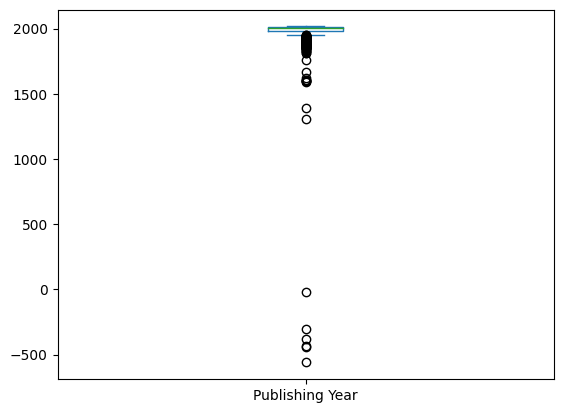

In [10]:
# grafico boxplot  coluna  Publishing Year do df

colnum = ['Publishing Year']

df1 = pd.DataFrame(df, columns=colnum)
ax = df1.plot.box()


Tinha valores discrepantes p Publishing Year, como ano negativo, corrigindo


In [11]:
df = df[df['Publishing Year']>= 0]

distribuição apos correção nao retirando os outliers pq nosso problema é apenas de analise descritiva do dataset

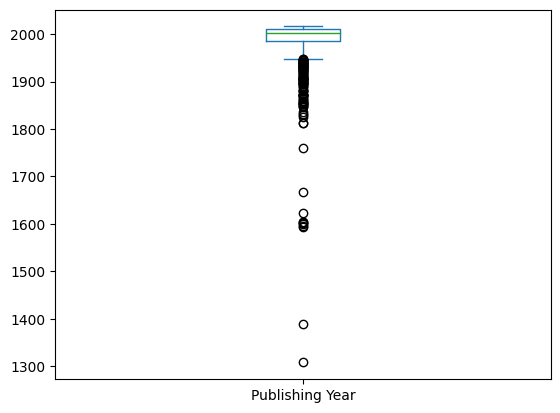

In [12]:
# distribuição apos correção

colnum = ['Publishing Year']

df1 = pd.DataFrame(df, columns=colnum)
ax = df1.plot.box()

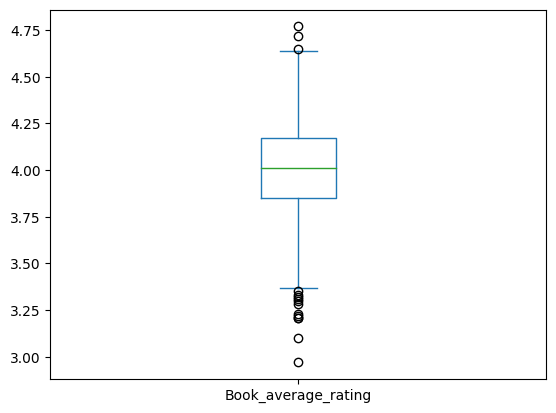

In [13]:
# grafico boxplot  coluna  Book_average_rating do df

colnum = ['Book_average_rating']

df1 = pd.DataFrame(df, columns=colnum)
ax = df1.plot.box()

Essa coluna nao precisou de tratamento, nao retirando os outliers pq nosso problema é apenas de analise descritiva do dataset

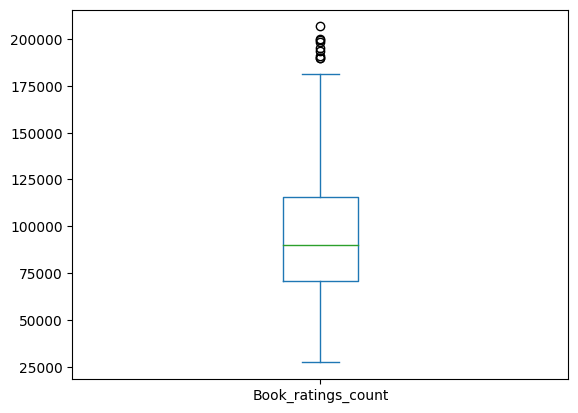

In [14]:
 # grafico boxplot  coluna  Book_ratings_count do df

colnum = ['Book_ratings_count']

df1 = pd.DataFrame(df, columns=colnum)
ax = df1.plot.box()

Essa coluna tbm nao precisou de tratament, nao retirando os outliers pq nosso problema é apenas de analise descritiva do dataset

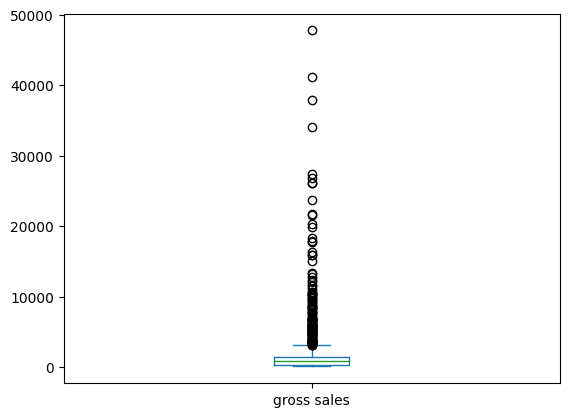

In [15]:
 # grafico boxplot  coluna  gross sales	 do df

colnum = ['gross sales']

df1 = pd.DataFrame(df, columns=colnum)
ax = df1.plot.box()

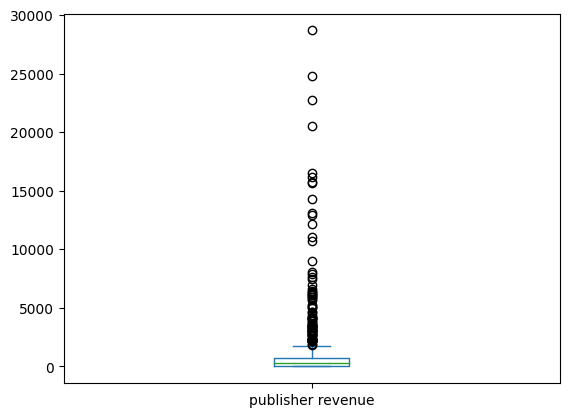

In [16]:
 # grafico boxplot  coluna  publisher revenue	 do df

colnum = ['publisher revenue']

df1 = pd.DataFrame(df, columns=colnum)
ax = df1.plot.box()

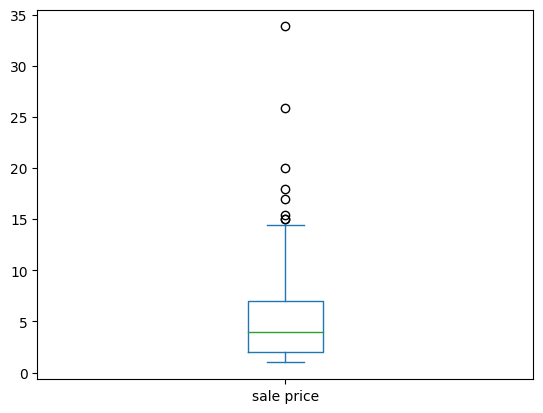

In [17]:
 # grafico boxplot  coluna  sale price	 do df

colnum = ['sale price']

df1 = pd.DataFrame(df, columns=colnum)
ax = df1.plot.box()

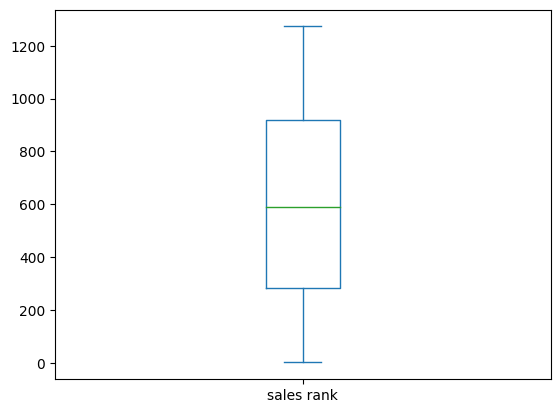

In [18]:
 # grafico boxplot  coluna  sales rank	 do df

colnum = ['sales rank']

df1 = pd.DataFrame(df, columns=colnum)
ax = df1.plot.box()

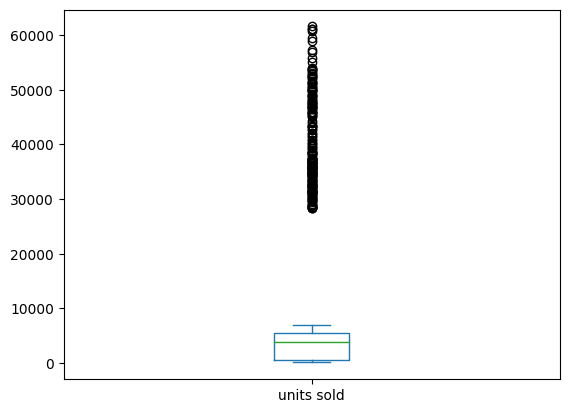

In [19]:
 # grafico boxplot  coluna  units sold	 do df

colnum = ['units sold']

df1 = pd.DataFrame(df, columns=colnum)
ax = df1.plot.box()

Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

In [20]:
df.describe()

,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,1985.137097,4.003740,95573.408266,1892.022228,851.842609,4.848216,605.477823,9770.614919
std,56.607571,0.247256,31664.722436,4033.950983,2309.802428,3.588222,369.491465,15461.295069
min,1308.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,1985.000000,3.850000,70997.500000,371.127500,0.000000,1.990000,282.750000,566.250000
50%,2003.000000,4.010000,90051.500000,812.105000,261.813000,3.990000,590.000000,3924.000000
75%,2010.000000,4.170000,115679.500000,1496.342500,722.500500,6.990000,920.250000,5406.750000
max,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


PODEMOS PERCEBER:

colunas com outliers sao:

Gross Sales, publisher revenue, sale price e units sold

Pré-processamento de dados:
Objetivo: realizar operações de limpeza, tratamento e preparação dos dados.

Verifique quais operações de pré-processamento podem ser interessantes para o seu problema e salve visões diferentes do seu dataset (por exemplo, normalização, padronização, discretização e one-hot-encoding).

Trate (removendo ou substituindo) os valores faltantes (se existentes).

Realize outras transformações de dados porventura necessárias.

Explique, passo a passo, as operações realizadas, justificando cada uma delas.

Se julgar necessário, utilizando os dados pré-processados, volte na etapa de análise exploratória e verifique se surge algum insight diferente após as operações realizadas.


In [21]:
df.columns

Index(['Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

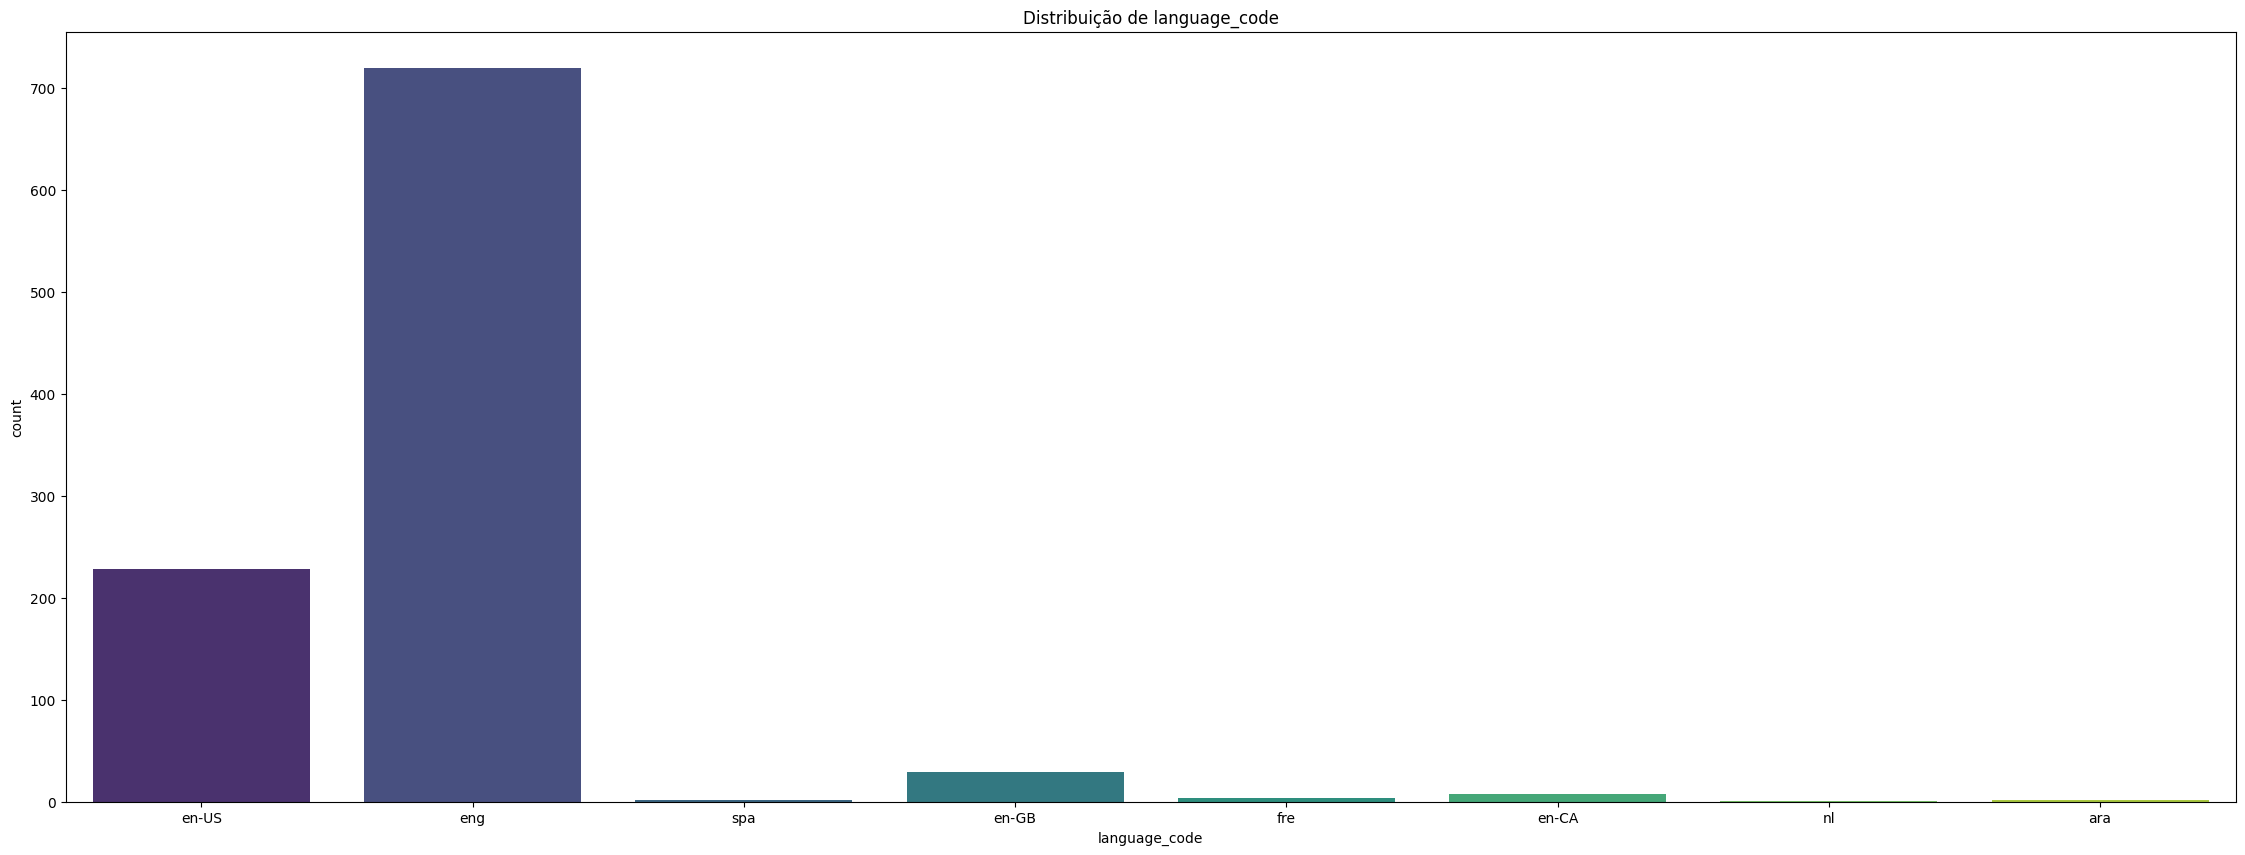

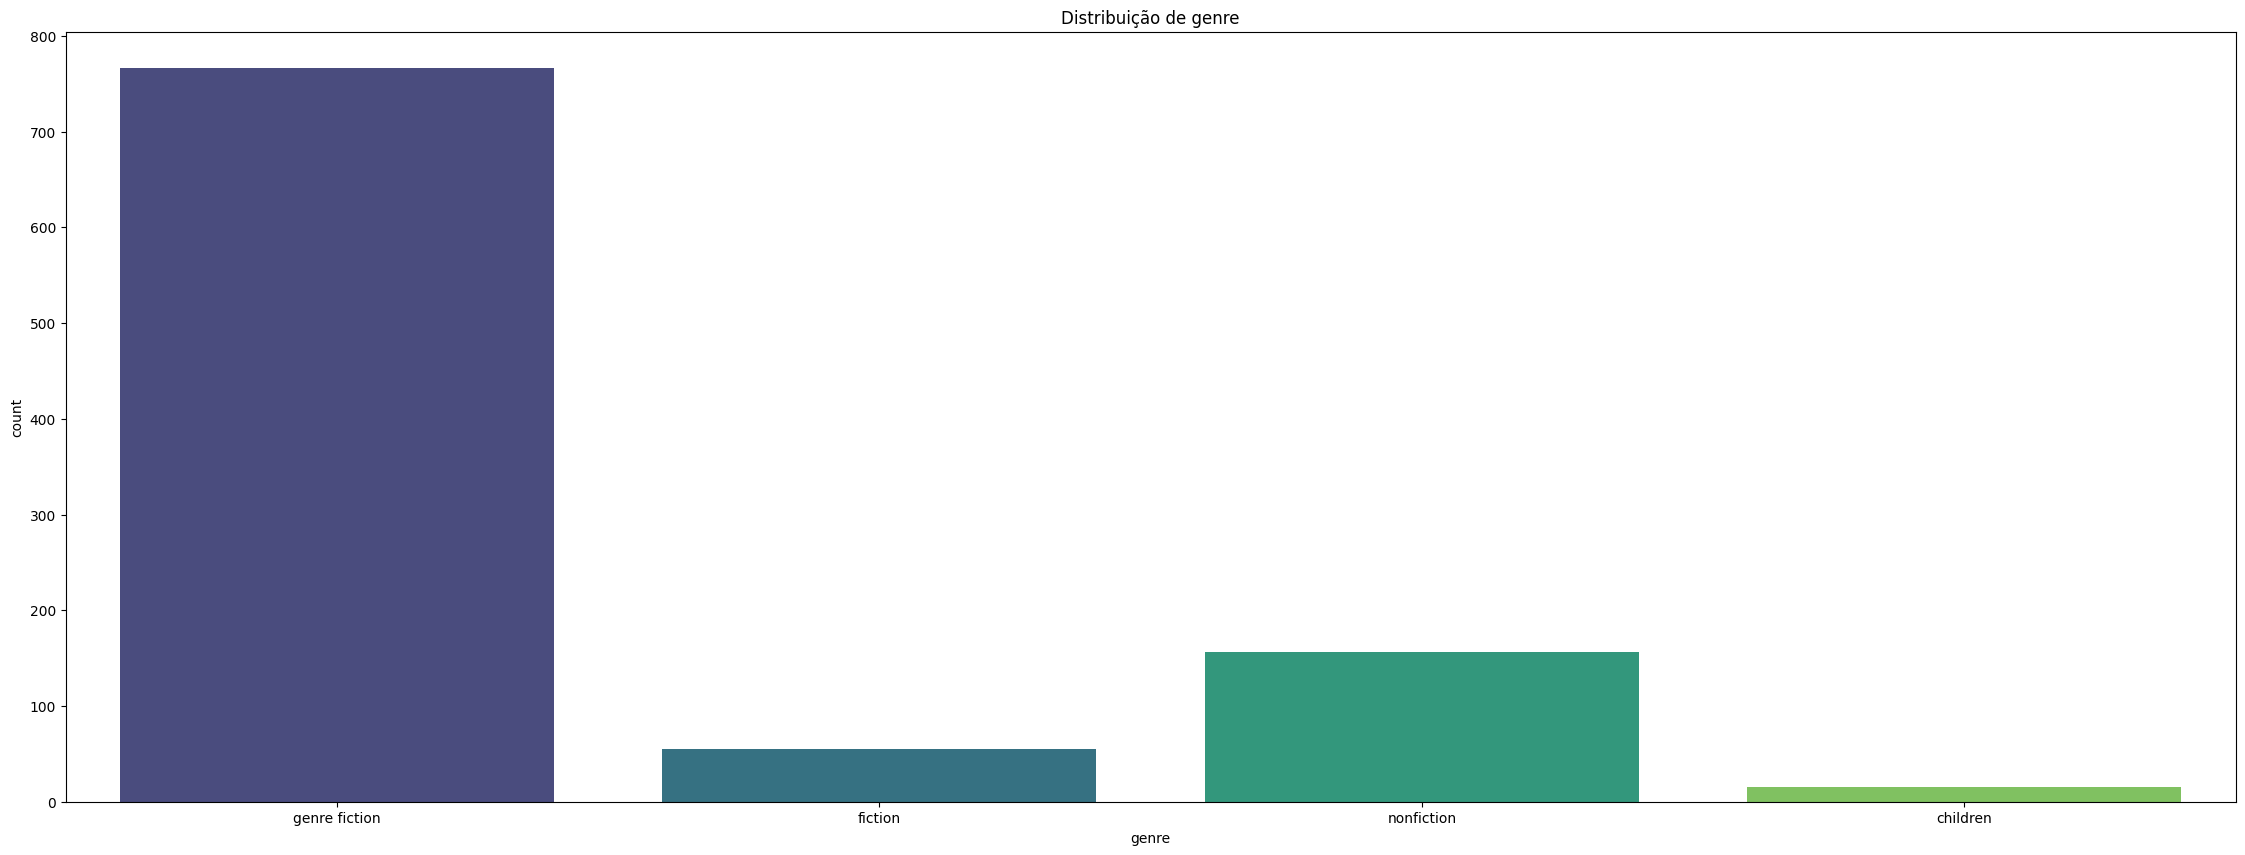

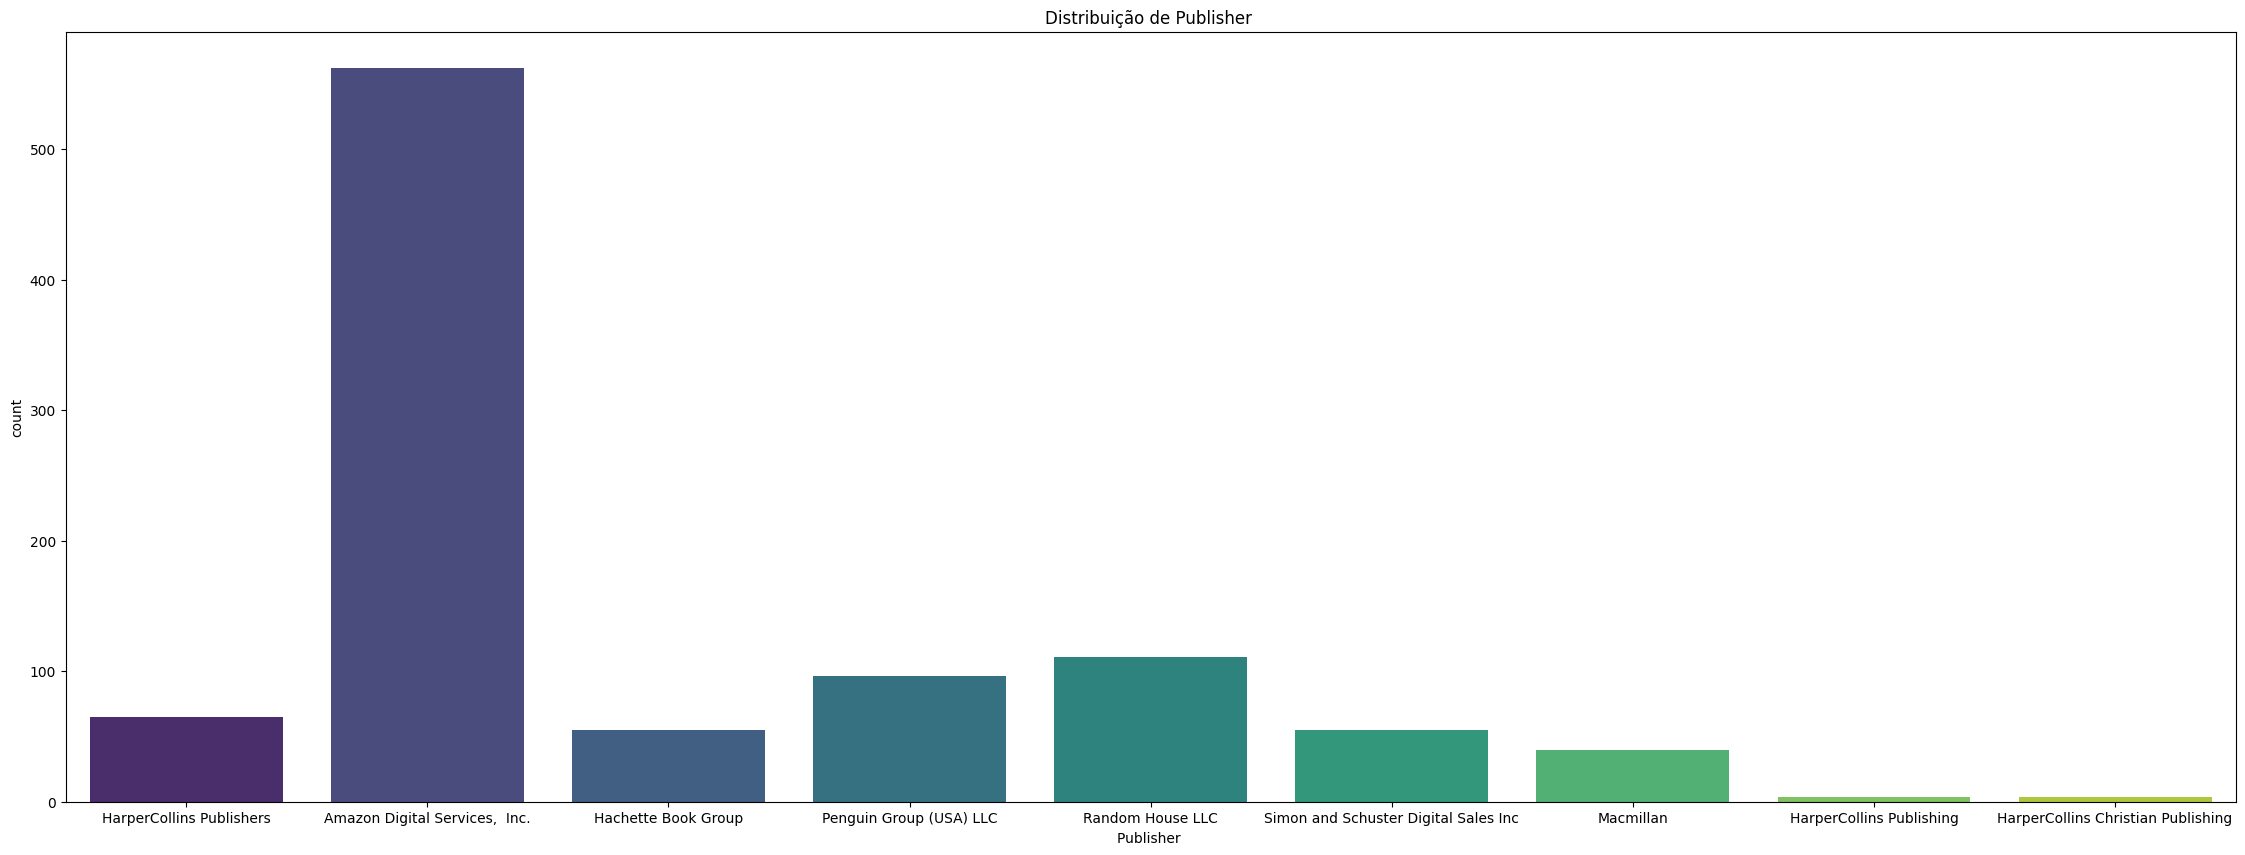

In [35]:
# Plotar distribuição para colunas categóricas
categorical_columns = ['language_code',	'genre', 'Publisher ']
for column in categorical_columns:
    plt.figure(figsize=(28, 10))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribuição de {column}')
    plt.show()

Compreensão dos livros de maior faturamento

In [23]:
df.columns

Index(['Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [29]:
dftop = df.sort_values(by=['gross sales'], ascending=False)
dftop = dftop.head(20)
dftop

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
6,2011.0,The Power of Habit,Charles Duhigg,eng,Intermediate,4.03,155977,genre fiction,27491.67,16495.002,6.99,6,HarperCollins Publishers,3933
26,1993.0,The Virgin Suicides,Jeffrey Eugenides,eng,Intermediate,3.83,159249,genre fiction,26904.06,16142.436,10.91,28,Penguin Group (USA) LLC,2466
7,1994.0,Midnight in the Garden of Good and Evil,John Berendt,eng,Intermediate,3.90,167997,nonfiction,26182.00,15709.200,6.89,8,Hachette Book Group,3800
8,2012.0,Hopeless,Colleen Hoover,eng,Intermediate,4.34,189938,genre fiction,26093.67,15656.202,6.99,9,HarperCollins Publishers,3733
9,1905.0,A Little Princess,"Frances Hodgson Burnett, Nancy Bond",eng,Intermediate,4.20,199872,genre fiction,23792.34,14275.404,6.49,10,Random House LLC,3666
14,1922.0,The Velveteen Rabbit,"Margery Williams Bianco, William Nicholson",eng,Intermediate,4.29,173469,genre fiction,21797.82,13078.692,6.54,15,Random House LLC,3333


Compreendendo os Author_Rating dos livros de maior faturamento

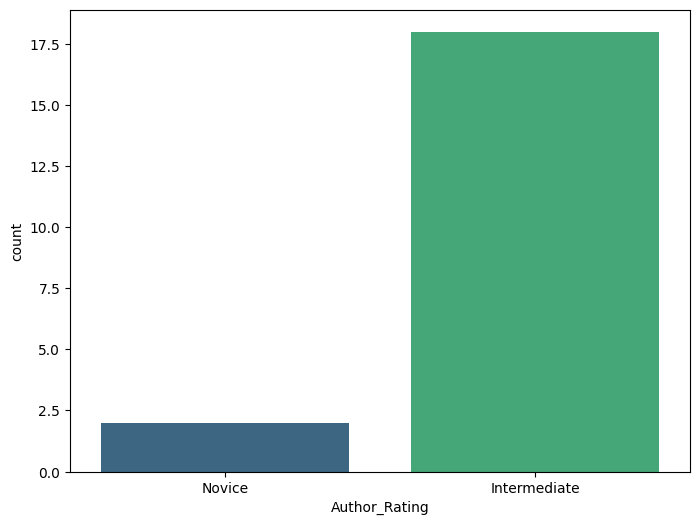

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dftop['Author_Rating'], data=dftop, palette='viridis')
plt.show()

compreendendo as linguagens dos livros de maior faturamento

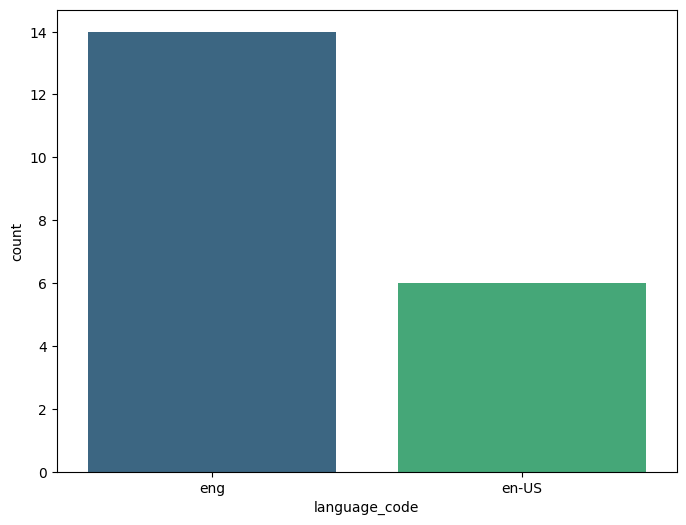

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dftop['language_code'], data=dftop, palette='viridis')
plt.show()

Compreendendo o genero dos livros de maior faturamento

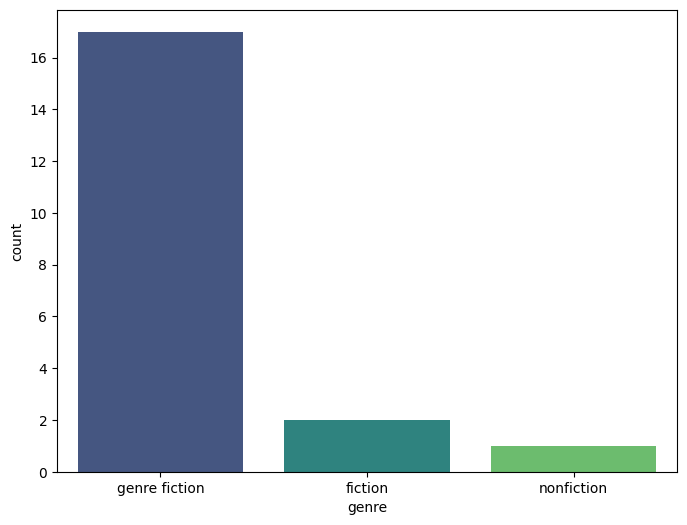

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dftop['genre'], data=dftop, palette='viridis')
plt.show()

Identificando padrões dos livros de menor faturamento


In [36]:
dfbot = df.sort_values(by=['gross sales'], ascending=False)
dfbot = dfbot.tail(20)
dfbot

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
939,2012.0,This Man,Jodi Ellen Malpas,eng,Excellent,4.13,79461,genre fiction,108.90,65.340,0.99,1102,"Amazon Digital Services, Inc.",4320
928,2004.0,At First Sight,Nicholas Sparks,en-US,Intermediate,3.81,62219,genre fiction,108.90,65.340,0.99,1091,"Amazon Digital Services, Inc.",4320
948,2004.0,Furies of Calderon,Jim Butcher,eng,Excellent,4.12,70269,genre fiction,108.90,0.000,0.99,1119,"Amazon Digital Services, Inc.",4280
927,1994.0,Captain Corelli's Mandolin,Louis de BerniÃ¨res,eng,Intermediate,3.95,57583,genre fiction,108.90,65.340,0.99,1091,"Amazon Digital Services, Inc.",4360
960,2009.0,The Strain,"Guillermo del Toro, Chuck Hogan",en-US,Intermediate,3.77,58631,genre fiction,107.91,64.746,0.99,1132,"Amazon Digital Services, Inc.",4280
963,2007.0,Born Standing Up: A Comic's Life,Steve Martin,eng,Intermediate,3.87,60869,nonfiction,107.91,64.746,0.99,1137,"Amazon Digital Services, Inc.",4280
983,1999.0,In the Heart of the Sea: The Tragedy of the Wh...,Nathaniel Philbrick,en-US,Excellent,4.16,57259,genre fiction,107.91,0.000,0.99,1160,"Amazon Digital Services, Inc.",109
984,2006.0,Infidel,Ayaan Hirsi Ali,eng,Excellent,4.20,58432,genre fiction,107.91,0.000,0.99,1161,"Amazon Digital Services, Inc.",109
959,2015.0,Finders Keepers,Stephen King,eng,Excellent,4.03,36541,fiction,107.91,0.000,0.99,1131,"Amazon Digital Services, Inc.",4280
977,2015.0,"In a Dark, Dark Wood",Ruth Ware,eng,Intermediate,3.65,67344,genre fiction,107.91,0.000,0.99,1153,"Amazon Digital Services, Inc.",4240


Compreendendo os Author_Rating dos livros de menor faturamento

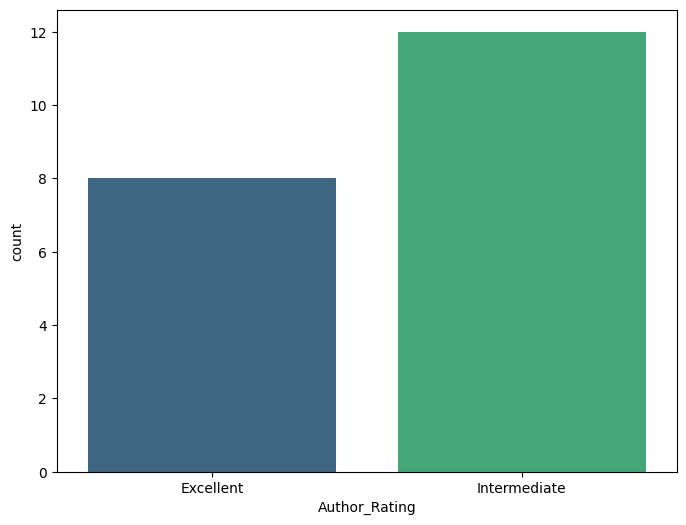

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dfbot['Author_Rating'], data=dfbot, palette='viridis')
plt.show()

compreendendo as linguagens dos livros de menor faturamento

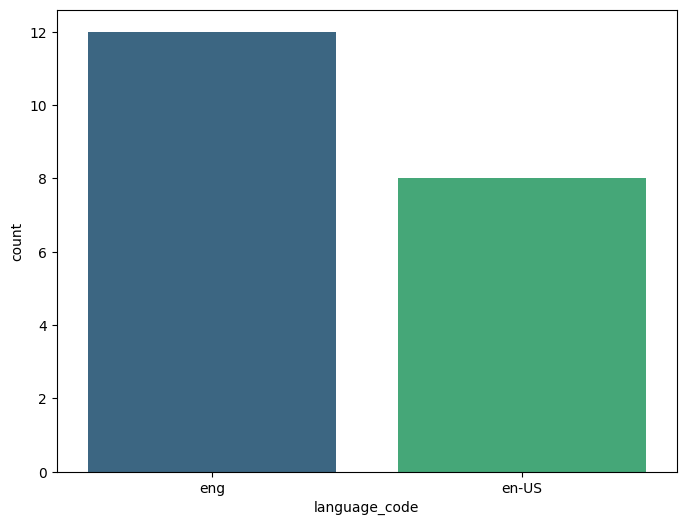

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dfbot['language_code'], data=dfbot, palette='viridis')
plt.show()

compreendendo os generos dos livros de menor faturamento

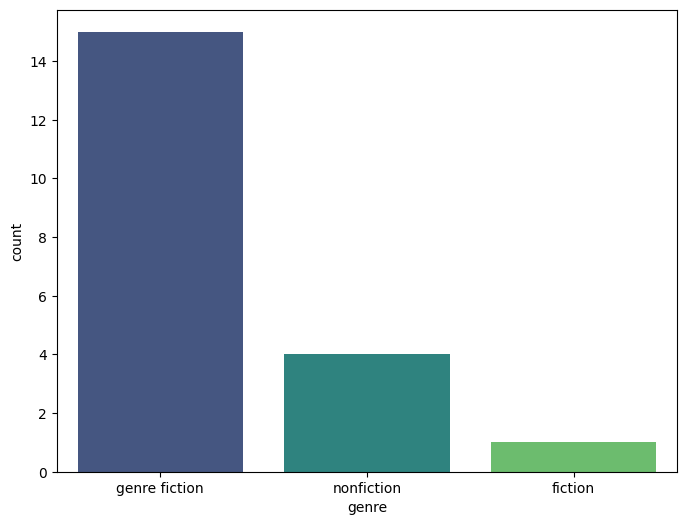

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dfbot['genre'], data=dfbot, palette='viridis')
plt.show()

CONCLUSÂO

as distribuições dos livros de maior e de menor faturamento foram similares nos quesitos language_code e genre, mas pudemos ver uma discrepância nos ratings dos autores. Com autores considerados excelentes apresentado considerável parte dos livros de menor faturamento enquanto nem apareceram nos livros de maior faturamento. Tal observação ajuda a validar o senso comum de best sellers que não sao necessariamente escritos pelos autores mais avançados.